In [496]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import os
import math
import scipy.stats
from scipy.optimize import curve_fit

In [2]:
# read data
# you may need to change the path

path = os.getcwd()

data = pd.read_csv(path + '\\data.dat', 
                   sep='\t', header=None)

data.columns = ['time', 'node1', 'node2', 'type1', 'type2']

In [3]:
data.head()

,time,node1,node2,type1,type2
0,140,1157,1232,MED,ADM
1,160,1157,1191,MED,MED
2,500,1157,1159,MED,MED
3,520,1157,1159,MED,MED
4,560,1159,1191,MED,MED


In [4]:
len(set(list(data['node1'])))

65

In [5]:
len(set(list(data['node2'])))

74

In [6]:
# four types of nodes
set(list(data['type1']))

{'ADM', 'MED', 'NUR', 'PAT'}

In [82]:
nodes_1 = data[['node1', 'type1']].copy()
nodes_1.columns = ['node', 'type']
nodes_2 = data[['node2', 'type2']].copy()
nodes_2.columns = ['node', 'type']

In [83]:
nodes = pd.concat([nodes_1, nodes_2], axis=0)
nodes = nodes.reset_index(drop=True)
nodes = nodes.drop_duplicates()
nodes = nodes.reset_index(drop=True)

In [84]:
# nodes.columns = ['node', 'type']

In [85]:
nodes.tail()

,node,type
70,1702,PAT
71,1769,PAT
72,1701,PAT
73,1784,PAT
74,1671,ADM


In [86]:
nodes[nodes['type']=='ADM']

,node,type
6,1098,ADM
9,1232,ADM
13,1179,ADM
50,1209,ADM
51,1658,ADM
58,1535,ADM
60,1525,ADM
74,1671,ADM


In [37]:
# start: December 6, 13h
# end : December 10, 14h
# total time: 4 days + 1 hours = 97 hours
# 97 hours = 5820 minutes = 349200 seconds


# only consider 4 days
# for each day, we consider the networks every 2 hours
# 4 hours = 240 minutes =  14400 seconds
# 24 hours = 1440 minutes = 86400 seconds

second_start = list(np.linspace(start=0, stop=14400*23,num = 24))
second_end = list(np.linspace(start=14400, stop=14400*24,num = 24))

In [38]:
print(second_start)

[0.0, 14400.0, 28800.0, 43200.0, 57600.0, 72000.0, 86400.0, 100800.0, 115200.0, 129600.0, 144000.0, 158400.0, 172800.0, 187200.0, 201600.0, 216000.0, 230400.0, 244800.0, 259200.0, 273600.0, 288000.0, 302400.0, 316800.0, 331200.0]


In [39]:
print(second_end)

[14400.0, 28800.0, 43200.0, 57600.0, 72000.0, 86400.0, 100800.0, 115200.0, 129600.0, 144000.0, 158400.0, 172800.0, 187200.0, 201600.0, 216000.0, 230400.0, 244800.0, 259200.0, 273600.0, 288000.0, 302400.0, 316800.0, 331200.0, 345600.0]


In [47]:
# split the data by four hours' length

data_split = []

for i in range(24):
    
    data_split_i = data[(data['time'] >= second_start[i]) & 
                        (data['time'] < second_end[i])].copy()
    data_split_i = data_split_i.reset_index(drop=True)
    
    data_split.append(data_split_i)

In [48]:
# function 
def gen_weight(data):
    
    data_split_i = data[['node1','node2']].copy()

    #data_split_i.groupby(['node1','node2','type1','type2'])['node1'].count()

    data_split_i = [[name[0], name[1], len(group)] \
                    for name, group in data_split_i.groupby(['node1','node2'])]
    data_split_i = pd.DataFrame(data_split_i,
                                columns = ['node1','node2', 'count'])
    return data_split_i
    

In [49]:
edges= []

for i in range(len(data_split)):
    
    edges.append(gen_weight(data_split[i]))

In [50]:
edges[3]

,node1,node2,count
0,1238,1246,1
1,1238,1305,1
2,1238,1327,2
3,1238,1352,1
4,1238,1374,2


In [51]:
len(edges)

24

In [115]:
# example

example = edges[2]

# undirected graph
g = nx.from_pandas_edgelist(example,
                            source = 'node1',
                            target = 'node2',
                            edge_attr = 'count',
                            create_using = nx.Graph())

In [53]:
example.tail()

,node1,node2,count
19,1246,1391,8
20,1246,1393,7
21,1246,1395,1
22,1246,1399,4
23,1305,1383,1


In [113]:
#nodes.columns
nodes_dict = nodes.set_index('node').to_dict(orient='index').items()

In [114]:
nodes_dict

dict_items([(1157, {'type': 'MED'}), (1159, {'type': 'MED'}), (1144, {'type': 'MED'}), (1152, {'type': 'MED'}), (1105, {'type': 'NUR'}), (1109, {'type': 'NUR'}), (1098, {'type': 'ADM'}), (1116, {'type': 'NUR'}), (1164, {'type': 'NUR'}), (1232, {'type': 'ADM'}), (1114, {'type': 'NUR'}), (1193, {'type': 'NUR'}), (1142, {'type': 'NUR'}), (1179, {'type': 'ADM'}), (1181, {'type': 'NUR'}), (1149, {'type': 'NUR'}), (1168, {'type': 'MED'}), (1191, {'type': 'MED'}), (1190, {'type': 'NUR'}), (1196, {'type': 'NUR'}), (1261, {'type': 'NUR'}), (1130, {'type': 'MED'}), (1148, {'type': 'MED'}), (1365, {'type': 'PAT'}), (1238, {'type': 'NUR'}), (1246, {'type': 'NUR'}), (1305, {'type': 'PAT'}), (1115, {'type': 'NUR'}), (1207, {'type': 'NUR'}), (1295, {'type': 'NUR'}), (1210, {'type': 'NUR'}), (1100, {'type': 'NUR'}), (1108, {'type': 'NUR'}), (1260, {'type': 'MED'}), (1377, {'type': 'PAT'}), (1320, {'type': 'PAT'}), (1245, {'type': 'NUR'}), (1221, {'type': 'MED'}), (1202, {'type': 'NUR'}), (1205, {'type

In [116]:
g.add_nodes_from(nodes_dict)

In [141]:
g.remove_nodes_from(list(nx.isolates(g)))

In [142]:
nx.degree_centrality(g).items() 
# list()

dict_items([(1190, 0.058823529411764705), (1193, 0.058823529411764705), (1238, 0.47058823529411764), (1246, 0.8823529411764706), (1363, 0.11764705882352941), (1365, 0.11764705882352941), (1383, 0.1764705882352941), (1391, 0.11764705882352941), (1393, 0.11764705882352941), (1395, 0.11764705882352941), (1399, 0.11764705882352941), (1305, 0.11764705882352941), (1323, 0.058823529411764705), (1327, 0.058823529411764705), (1332, 0.058823529411764705), (1352, 0.058823529411764705), (1374, 0.058823529411764705), (1378, 0.058823529411764705)])

In [231]:
def draw_picture(G, title):
    
    fig = plt.figure(figsize=(10,8))
    plt.title(title)
    
    pos = nx.kamada_kawai_layout(G)
    # pos = nx.spring_layout(G)
    # pos = nx.shell_layout(G)
    # pos = nx.spectral_layout(G)
    
    node_color = []
    for node in G.nodes(data=True):
        if node[1]['type']=='ADM':
            node_color.append('blue')
        elif node[1]['type']=='MED':
            node_color.append('red')
        elif node[1]['type']=='NUR':
            node_color.append('yellow')
        elif node[1]['type']=='PAT':
            node_color.append('green')
    
    edge_width = []
    for edge in g.edges.data():
        edge_width.append(edge[2]['count']/10)
    
    node_options = {'node_color': node_color, 
                    'node_size': 30}
    
    edge_options = {'width': edge_width, 
                    'alpha': 0.7, 
                    'edge_color': 'gray'}
    
    label_options = {'font_size':10, 'font_color':'black',
                     'verticalalignment': 'bottom',
                     'horizontalalignment': 'left'}
    
    nx.draw_networkx_nodes(G, pos, **node_options)
    nx.draw_networkx_edges(G, pos, **edge_options)
    nx.draw_networkx_labels(G, pos, **label_options)
    
    # create legend
    l1 = mpatches.Patch(color='blue', label='ADM')
    l2 = mpatches.Patch(color='red', label='MED')
    l3 = mpatches.Patch(color='yellow', label='NUR')
    l4 = mpatches.Patch(color='green', label='PAT')
    plt.legend(handles=[l1,l2,l3,l4])
    
    #plt.show()
    
    return fig

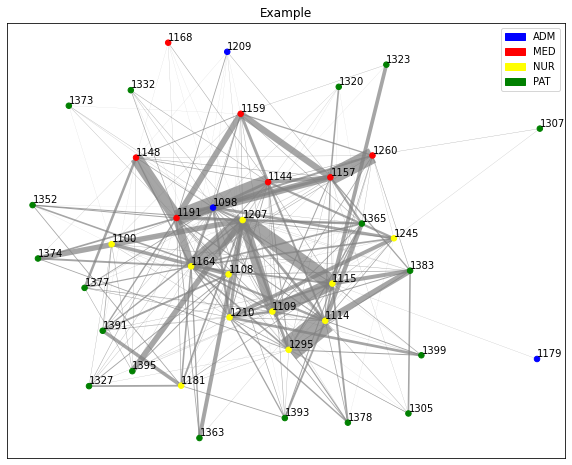

In [232]:
fig = draw_picture(g, 'Example')

In [194]:
len(edges)

24

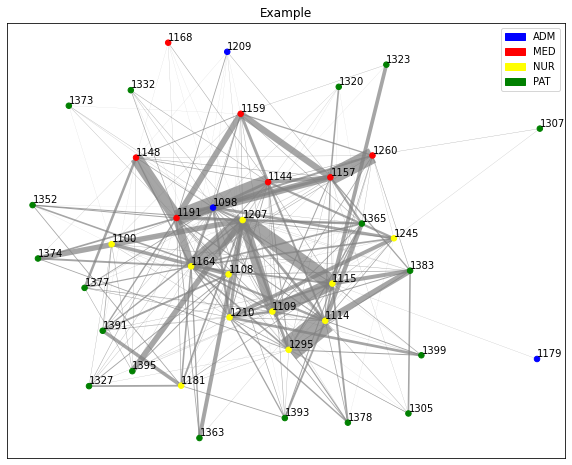

In [233]:
fig

In [284]:
# split the dataset by day

titles = ['13h-16h', '17h - 20h', '21h-24h',
          '01h-04h', '05h - 08h', '09h-12h']

In [285]:
# now draw the picture one by one

def draw_picture_day(edges, day):
    
    edges_day = edges[(day-1)*6: day*6]
    
    fig_list = []
    for i in range(1,7):
        g = nx.from_pandas_edgelist(edges_day[i-1],
                                    source = 'node1',
                                    target = 'node2',
                                    edge_attr = 'count',
                                    create_using = nx.Graph())
        g.add_nodes_from(nodes_dict)
        g.remove_nodes_from(list(nx.isolates(g)))
        
        fig = draw_picture(g, titles[i-1])
        fig.savefig(path + '\\picture\\day' + str(day) + '_'+ titles[i-1] +'.jpg')
        
        fig_list.append(fig)
    
    return fig_list
 

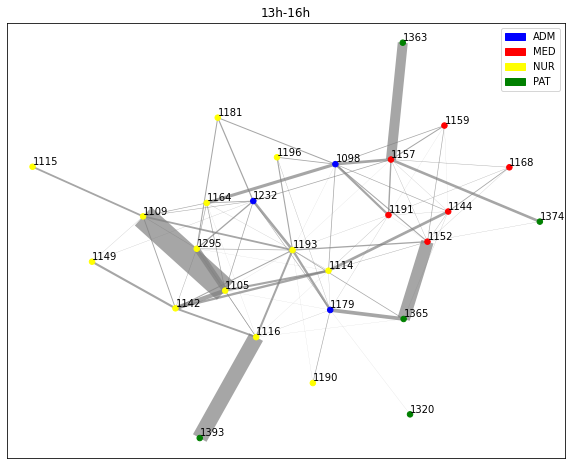

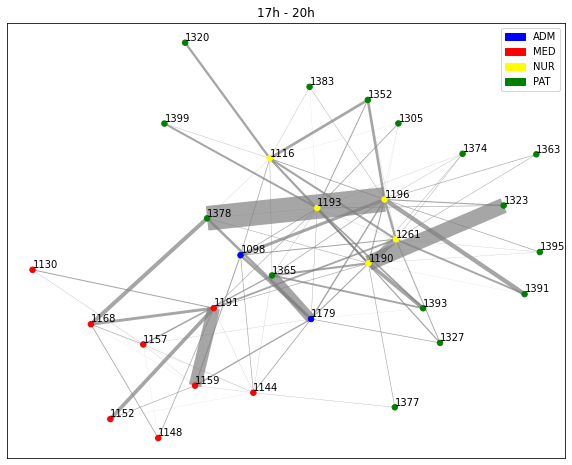

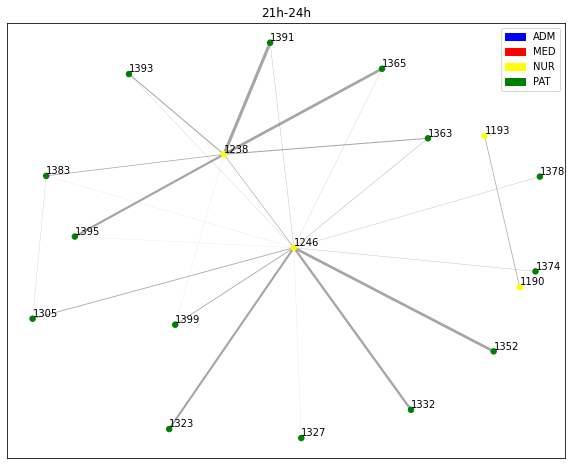

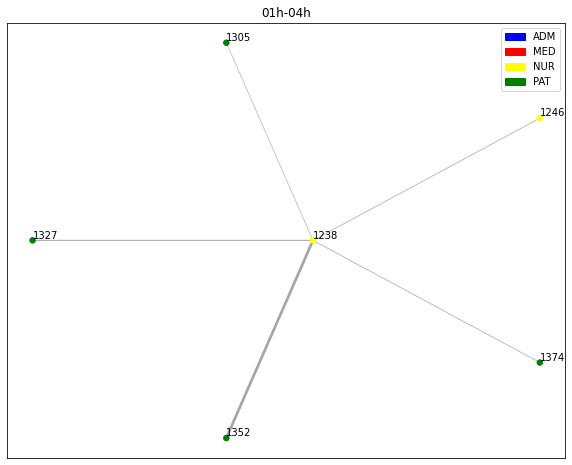

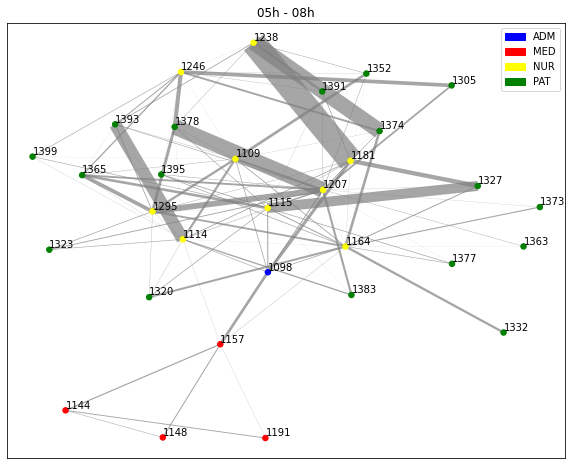

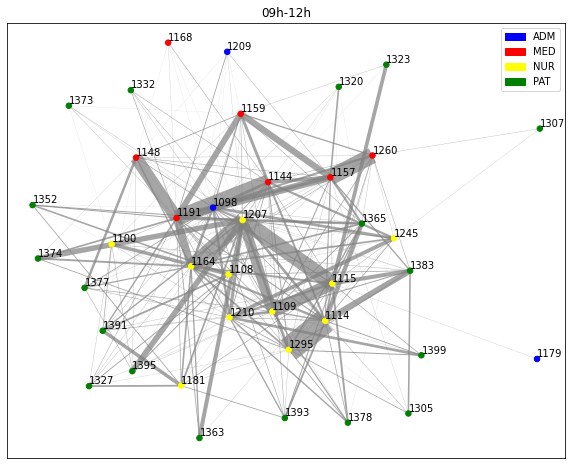

In [286]:
fig_list_1 = draw_picture_day(edges, 1)

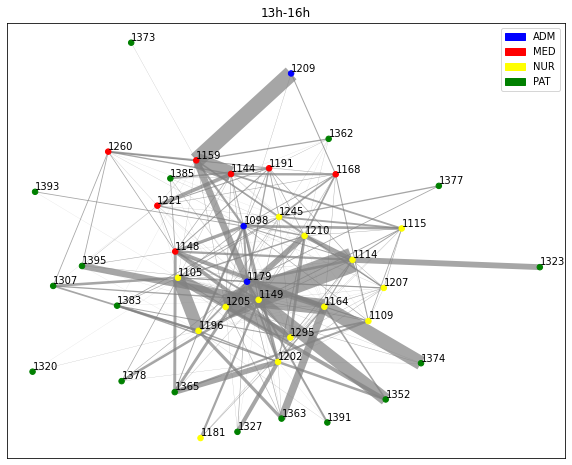

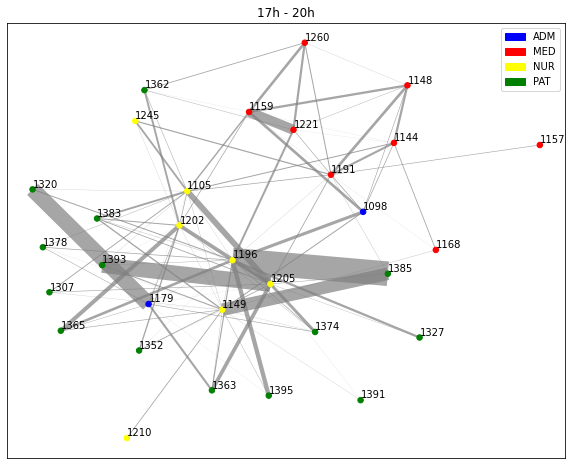

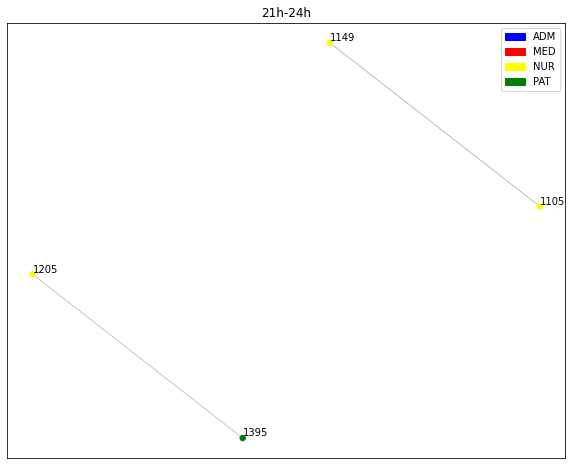

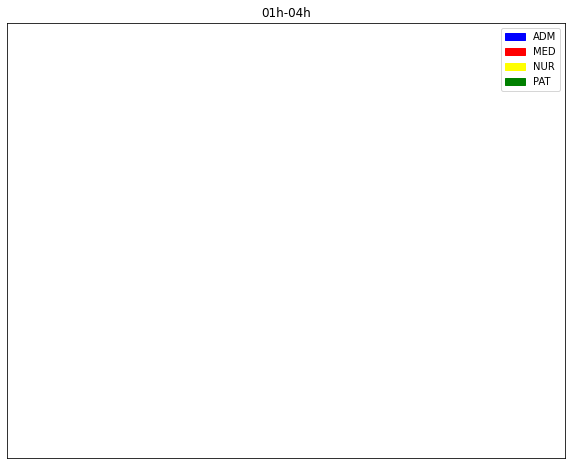

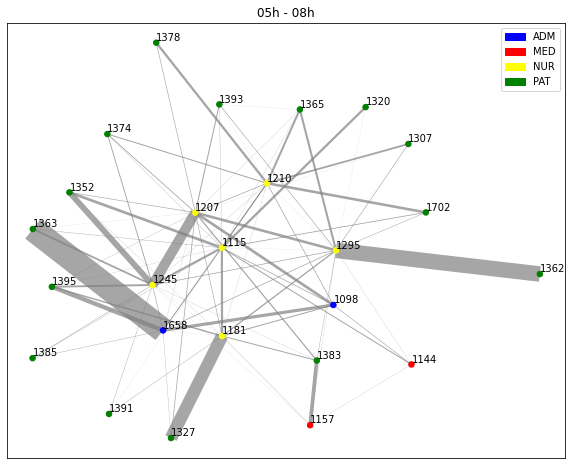

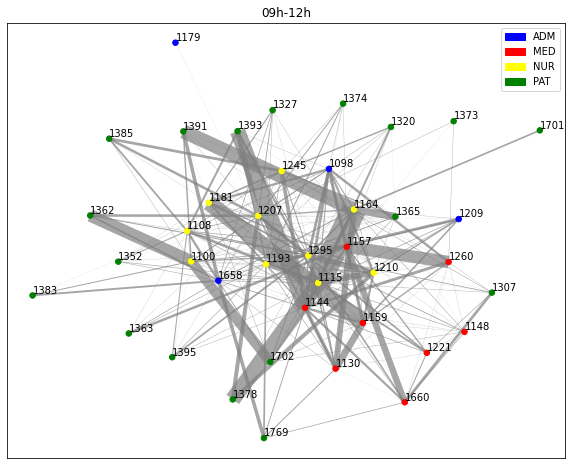

In [287]:
fig_list_2 = draw_picture_day(edges, 2)

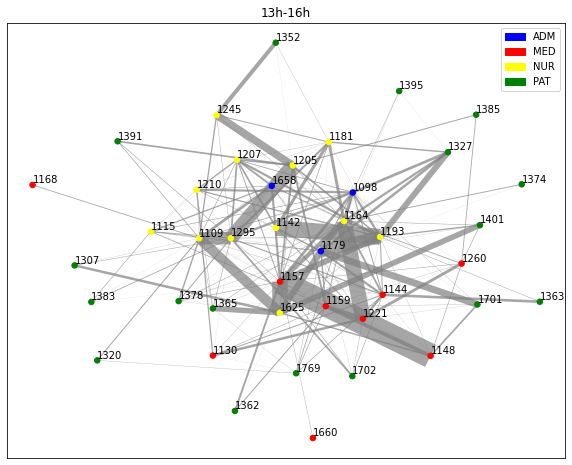

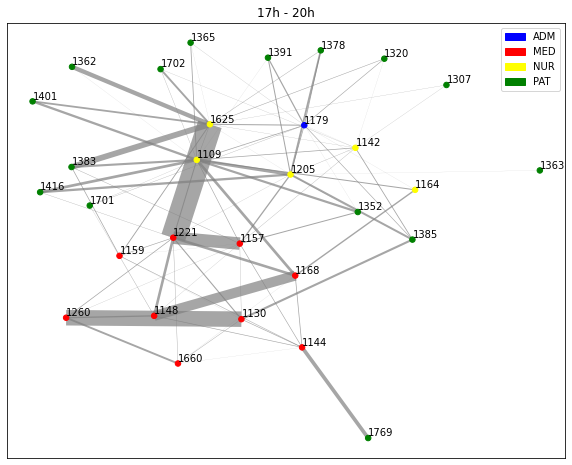

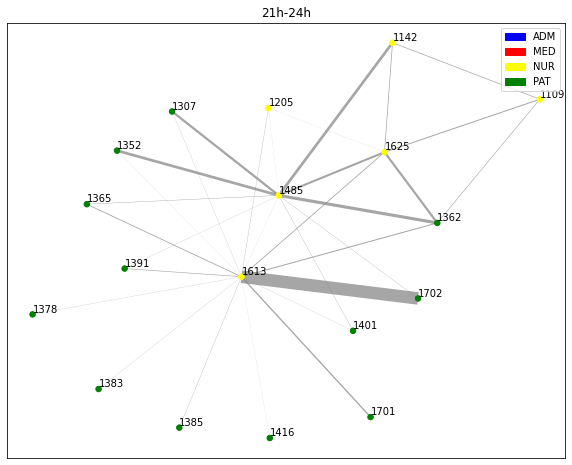

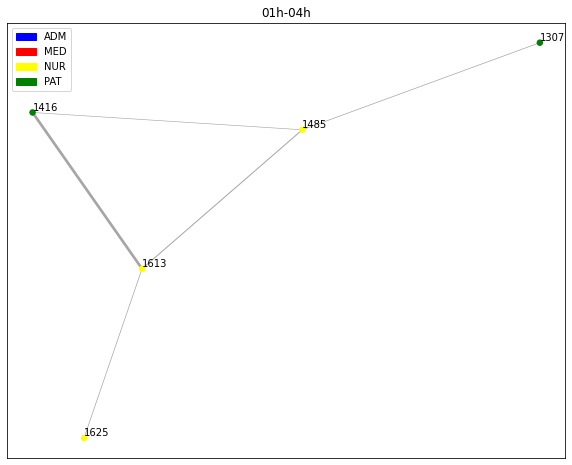

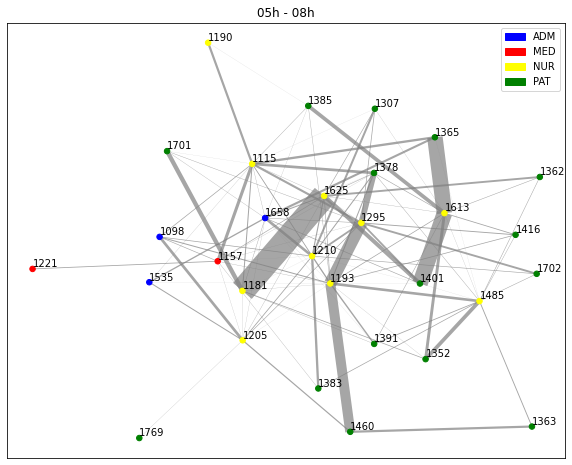

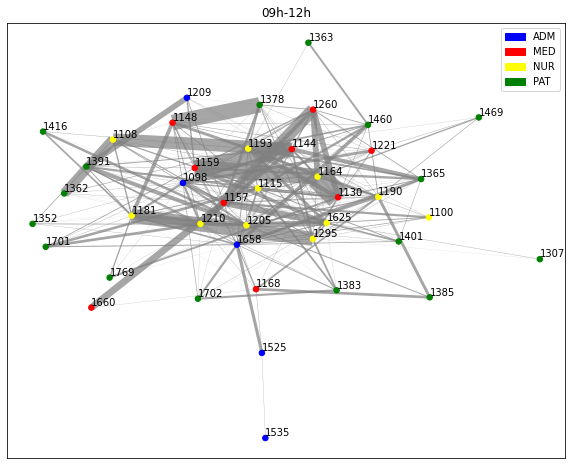

In [288]:
fig_list_3 = draw_picture_day(edges, 3)

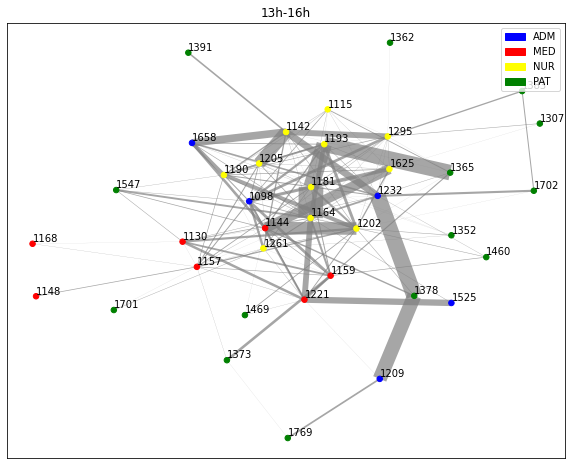

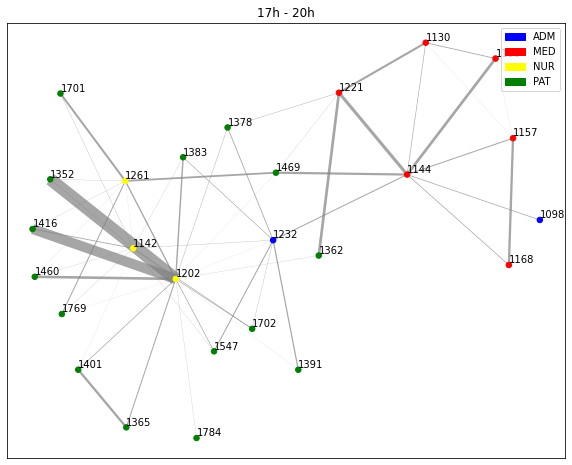

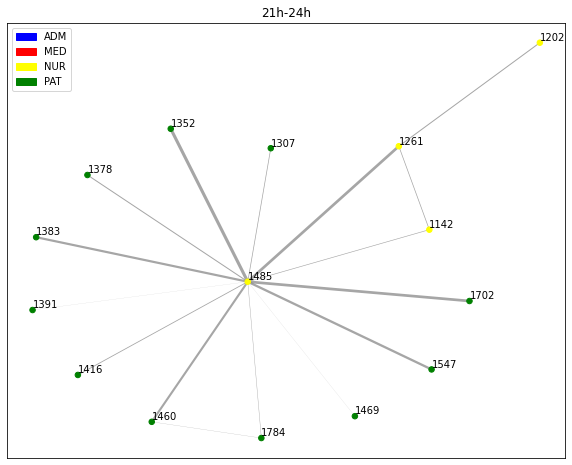

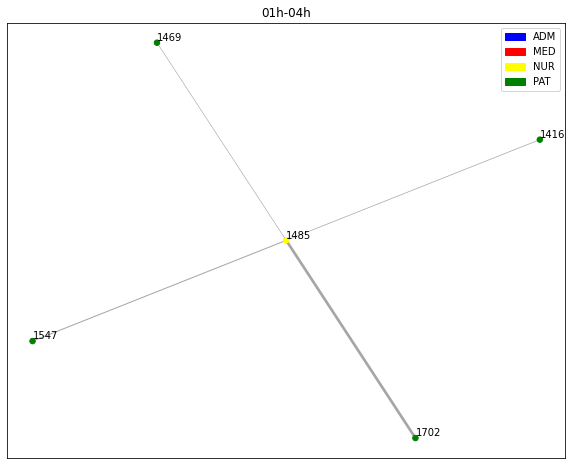

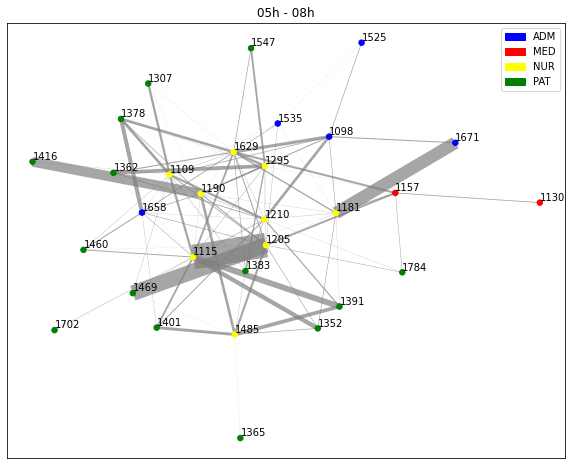

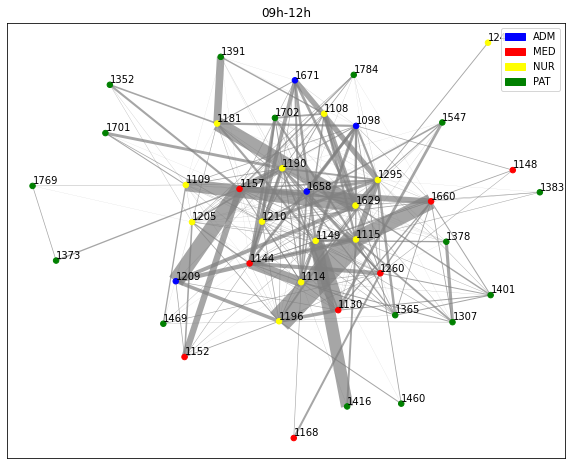

In [289]:
fig_list_4 = draw_picture_day(edges, 4)

In [278]:
# finding : 

# idea 1:
# the time really matters (totally different structure)
# calculate the overall indexes

# idea 2:
# the type of actors seems to be very important
# the interqctions in the same actors
# the interactions between different actors


# idea 3:
# the ties between some two specific actors are extremely strong
# the ego networks 


In [379]:
######     idea 1     ######

# local structure
def local_day(edges, day):
    
    edges_day = edges[(day-1)*6: day*6]
    
    density = []
    transitivity = []
    reciprocity = []
    average_clustering = []
    
    for i in range(0,6):
        
        g = nx.from_pandas_edgelist(edges_day[i-1],
                                    source = 'node1',
                                    target = 'node2',
                                    edge_attr = 'count',
                                    create_using = nx.Graph())
        try:
            density.append(nx.density(g))
            transitivity.append(nx.transitivity(g))
            reciprocity.append(nx.reciprocity(g))
            average_clustering.append(nx.average_clustering(g))
        except:
            density.append(None)
            transitivity.append(None)
            reciprocity.append(None)
            average_clustering.append(None)
        
    return density, reciprocity, transitivity, average_clustering


In [380]:
local_day(edges, 1)

([0.3481781376518219,
  0.245014245014245,
  0.22298850574712645,
  0.1568627450980392,
  0.3333333333333333,
  0.22580645161290322],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.550649932765576, 0.5, 0.4134275618374558, 0.16783216783216784, 0, 0.399],
 [0.7025433475370586,
  0.518151087595532,
  0.6708148061089237,
  0.444047619047619,
  0.0,
  0.606019291692916])

In [381]:
local_day(edges, 2)

([0.3371794871794872,
  0.2817073170731707,
  0.221505376344086,
  0.3333333333333333,
  0,
  None,
  0.28],
 [0.0, 0.0, 0.0, 0.0, None, 0.0],
 [0.5694050991501416,
  0.5322983088439146,
  0.4059917355371901,
  0,
  0,
  None,
  0.45261845386533667],
 [0.6835726538473027,
  0.6639877161823645,
  0.6657910001713059,
  0.0,
  None,
  0.747458130105189])

In [382]:
local_day(edges, 3)

([0.3353658536585366,
  0.2475609756097561,
  0.2,
  0.20261437908496732,
  0.5,
  0.2482758620689655],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5931302392148845,
  0.4843193157519601,
  0.3632286995515695,
  0.24489795918367346,
  0.42857142857142855,
  0.4398826979472141],
 [0.701991775698883,
  0.5952856360686256,
  0.5923451711687004,
  0.5475709475709476,
  0.3333333333333333,
  0.4881636394794289])

In [383]:
local_day(edges, 4)

([0.3231707317073171,
  0.22822822822822822,
  0.1723076923076923,
  0.1523809523809524,
  0.4,
  0.22758620689655173],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5859475719810915,
  0.5150812064965197,
  0.30945558739255014,
  0.07142857142857142,
  0,
  0.43805309734513276],
 [0.6999949482982356,
  0.49574929064093154,
  0.6239375820258174,
  0.2239316239316239,
  0.0,
  0.5288870388870389])

In [373]:
# global structure

# the global structure here mainly refers to the connectivity
# the centrality is in the next function

def global_day(edges, day):
    
    edges_day = edges[(day-1)*6: day*6]
    
    is_connected = []
    diameter= []
    average_shortest_path_length = []
    
    for i in range(0,6):
        
        g = nx.from_pandas_edgelist(edges_day[i-1],
                                    source = 'node1',
                                    target = 'node2',
                                    edge_attr = 'count',
                                    create_using = nx.Graph())
        try:
            is_connected.append(nx.is_connected(g))
            diameter.append(nx.diameter(g))
            average_shortest_path_length.append(nx.average_shortest_path_length(g))
        except:
            is_connected.append(None)
            diameter.append(None)
            average_shortest_path_length.append(None)
        
    return is_connected, diameter, average_shortest_path_length

In [374]:
global_day(edges, 1)

([True, True, True, False, None, True, True],
 [3, 4, 4, None, 2, 4],
 [1.7017543859649122,
  2.076923076923077,
  2.032183908045977,
  None,
  1.6666666666666667,
  2.032258064516129])

In [375]:
global_day(edges, 2)

([True, True, True, False, None, None, True],
 [3, 4, 4, None, None, 3],
 [1.7128205128205127,
  1.8304878048780489,
  1.9548387096774194,
  None,
  None,
  1.7833333333333334])

In [376]:
global_day(edges, 3)

([True, True, True, True, True, True],
 [4, 3, 4, 3, 3, 4],
 [1.7878048780487805,
  1.9048780487804877,
  2.066666666666667,
  1.9019607843137254,
  1.6,
  1.9333333333333333])

In [377]:
global_day(edges, 4)

([True, True, True, True, True, True],
 [3, 5, 4, 3, 2, 4],
 [1.7658536585365854,
  2.111111111111111,
  2.286153846153846,
  1.9523809523809523,
  1.6,
  2.045977011494253])

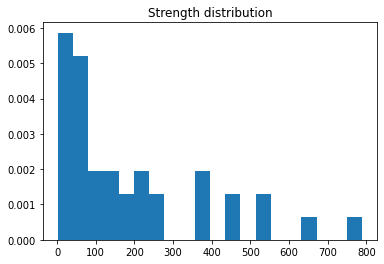

In [322]:
# degree & strength distribution

# centrality: four types of centrality
# who is the most important in the social networks
# degree centrality, betweenness centrality, 
# eigen vector centrality, closeness centrality

strength = [val for (node, val) in g.degree(weight='count')]
plt.hist(strength, bins=20, density = True)
plt.title('Strength distribution')
plt.show()

In [360]:
def degree_distribution_day(edges, day):
    
    edges_day = edges[(day-1)*6: day*6]
    
    degree_list = []
    strength_list = []
    
    for i in range(0,6):
        
        g = nx.from_pandas_edgelist(edges_day[i-1],
                                    source = 'node1',
                                    target = 'node2',
                                    edge_attr = 'count',
                                    create_using = nx.Graph())
        
        degree = [val for (node, val) in g.degree()]
        degree_list.append(degree)
        
        strength = [val for (node, val) in g.degree(weight='count')]
        strength_list.append(strength)
    
    fig = plt.figure(figsize=(16,6))
    
    ax1 = plt.subplot(121)
    plt.hist(degree_list, bins=15, label=titles, density =True)
    plt.legend(loc='upper right')
    plt.title('Degree distribution (Day ' + str(day) + ')')
    
    ax1 = plt.subplot(122)
    plt.hist(strength_list, bins=15, label=titles, density =True)
    plt.legend(loc='upper right')
    plt.title('Strength distribution (Day ' + str(day) + ')')
    
    fig.savefig(path + '\\picture\\distribution_day ' + str(day)+'.jpg')
    
    return None

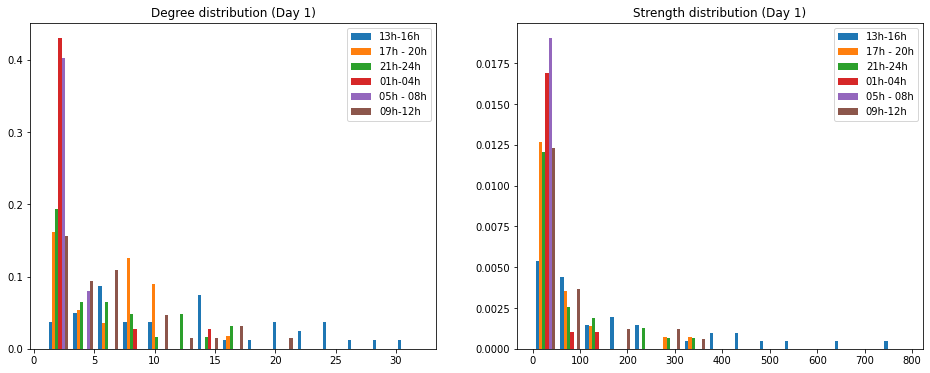

In [361]:
degree_distribution_day(edges, 1)

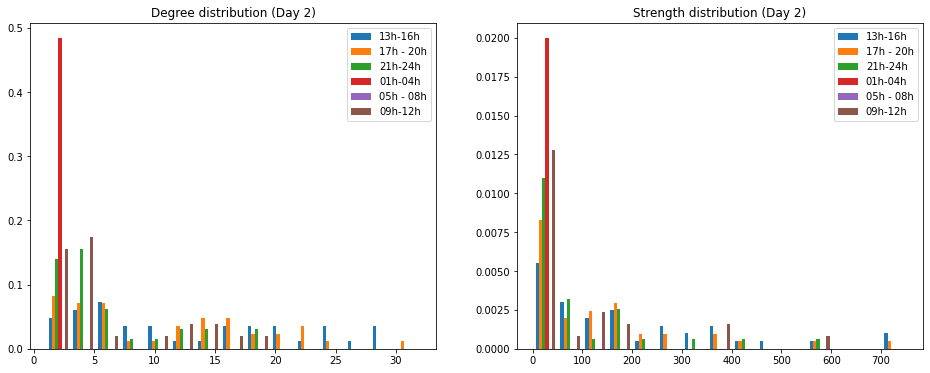

In [362]:
degree_distribution_day(edges, 2)

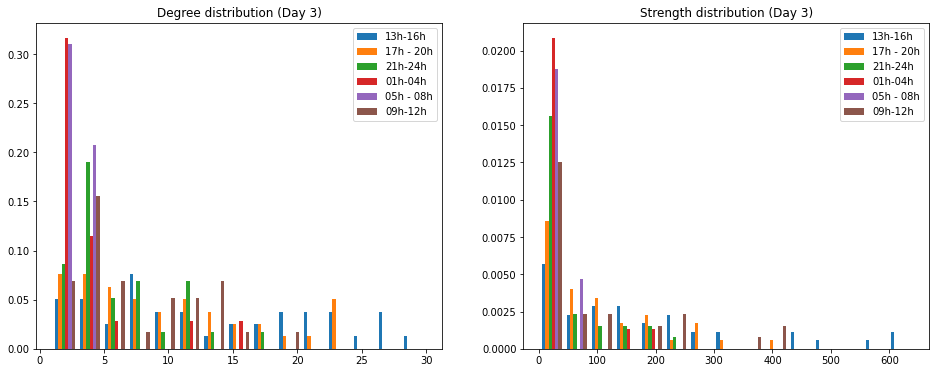

In [363]:
degree_distribution_day(edges, 3)

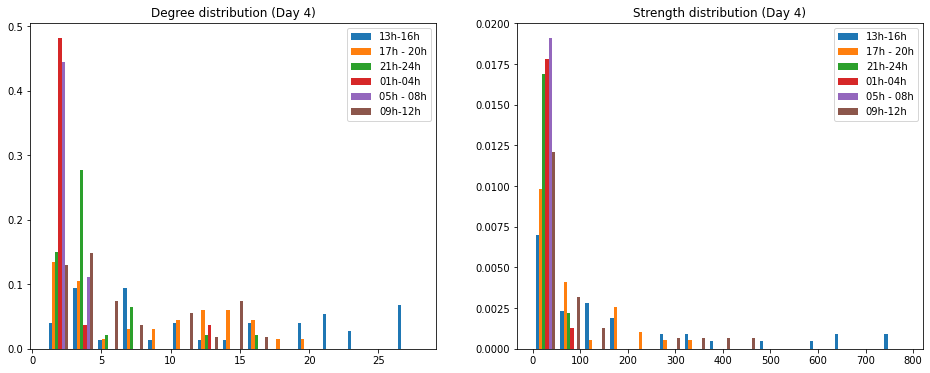

In [364]:
degree_distribution_day(edges, 4)

In [390]:
def powerlaw(x,a,b):
    return b*x**(a)

In [391]:
def logBinning(List, nbin):
    
    kmin = min(List)
    kmax = max(List)
    
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(List, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    
    return logBinDensity, logBins

In [480]:
def power_law_day(edges, day):
    
    edges_day = edges[(day-1)*6: day*6]
    
    degree_list = []
    strength_list = []
    
    for i in range(0,6):
        
        g = nx.from_pandas_edgelist(edges_day[i-1],
                                    source = 'node1',
                                    target = 'node2',
                                    edge_attr = 'count',
                                    create_using = nx.Graph())
        
        degree = [val for (node, val) in g.degree()]
        degree_list.append(degree)
        
        strength = [val for (node, val) in g.degree(weight='count')]
        strength_list.append(strength)
    
    # create legend
    legends = []
    colors = ['SlateBlue', '#FF4040', 'LimeGreen',
              'Gold', 'LightBlue', 'OliveDrab']
    
    for i in range(6):
        legends.append(mpatches.Patch(color=colors[i], label= titles[i]))
    
    
    fig = plt.figure(figsize=(16,6))
    ax1 = plt.subplot(121)
    
    for i in range(6):
        
        degree_list_i = degree_list[i]
        
        try:
            y,x=logBinning(degree_list_i,15)
            fitx=[i for (i,j) in zip(x,y) if i>1]
            fity=[j for (i,j) in zip(x,y) if i>1]
            popt, pcov = curve_fit(powerlaw, fitx, fity)
            
            plt.loglog(fitx,fity,'o',markersize=2,
                       c= colors[i])
            plt.loglog(sorted(x), powerlaw(sorted(x), *popt), '--',
                       linewidth=1, c=colors[i])
        except:
            continue
            
    plt.legend(loc='upper right', handles=legends)
    plt.title('Power law-fitted degree distribution (Day ' + str(day) + ')')
        
    ax2 = plt.subplot(122)
    for i in range(6):
        strength_list_i = strength_list[i]
        
        try:
            y,x=logBinning(strength_list_i,15)
            fitx=[i for (i,j) in zip(x,y) if i>1]
            fity=[j for (i,j) in zip(x,y) if i>1]
            popt, pcov = curve_fit(powerlaw, fitx, fity)
            plt.loglog(fitx,fity,'o',markersize=2,
                       c= colors[i])
            plt.loglog(sorted(x), powerlaw(sorted(x), *popt), '--',
                       linewidth=1, c=colors[i])
        except:
            continue
        
    plt.legend(loc='upper right', handles=legends)
    plt.title('Power law-fitted strength distribution (Day ' + str(day) + ')')
    
    fig.savefig(path + '\\picture\\power_law_day ' + str(day)+'.jpg')
    
    return None

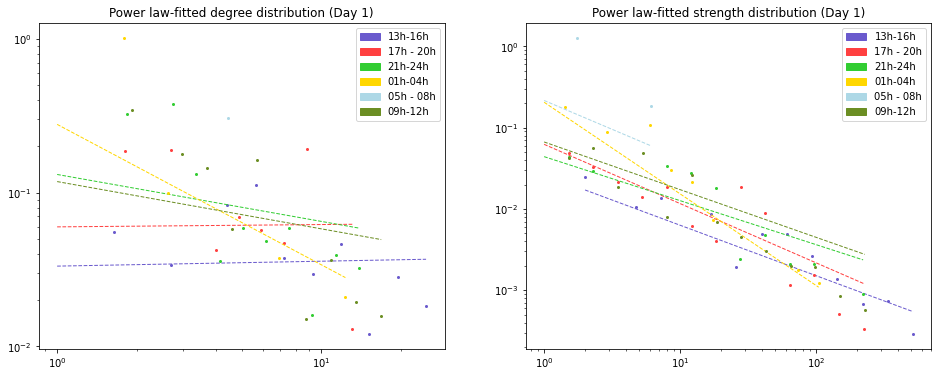

In [481]:
power_law_day(edges, 1)

d:\10_python\python-3.8.2\python\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
d:\10_python\python-3.8.2\python\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


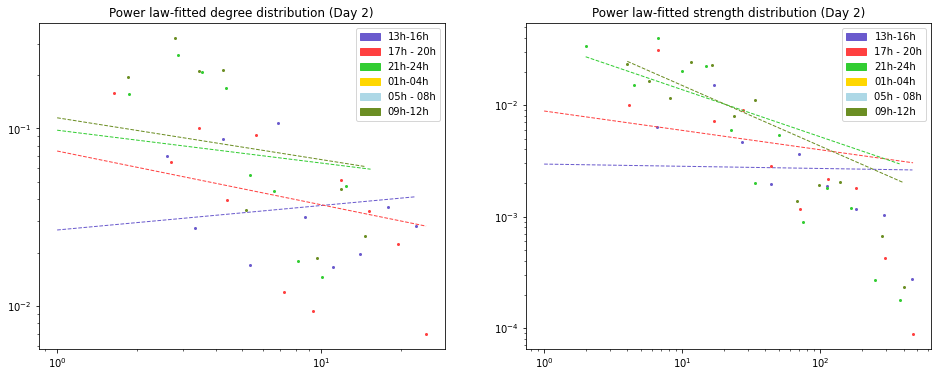

In [482]:
power_law_day(edges, 2)

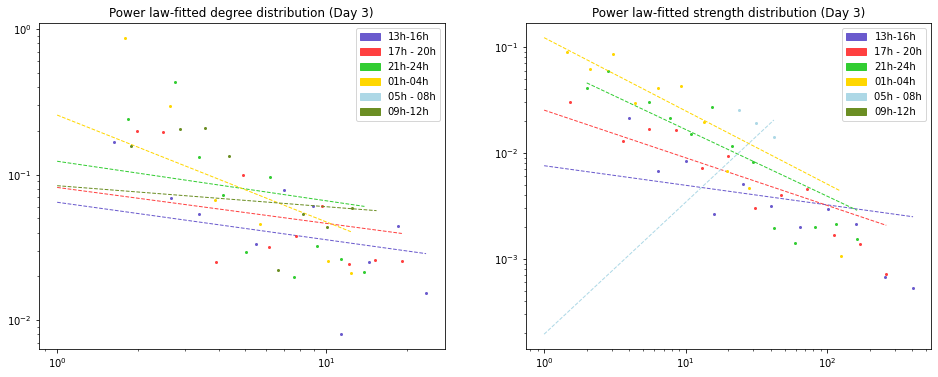

In [583]:
power_law_day(edges, 3)

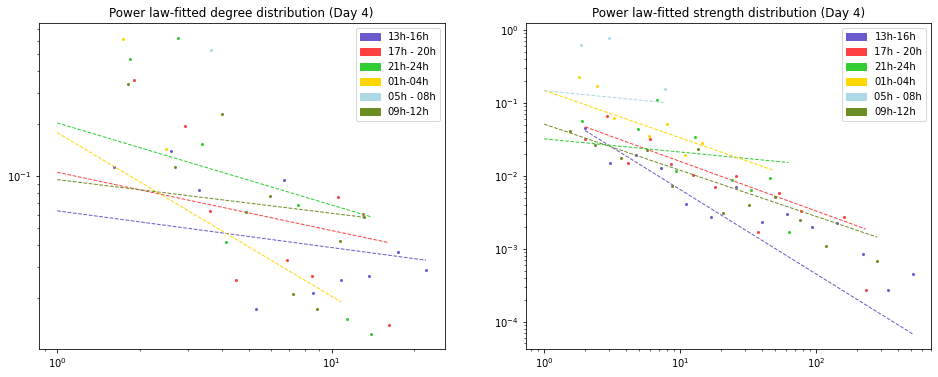

In [584]:
power_law_day(edges, 4)

In [578]:
def correlation_day(edges, day):
    
    edges_day = edges[(day-1)*6: day*6]
    
    degree_list = []
    strength_list = []
    
    for i in range(0,6):
        g = nx.from_pandas_edgelist(edges_day[i-1],
                                    source = 'node1',
                                    target = 'node2',
                                    edge_attr = 'count',
                                    create_using = nx.Graph())
        
        
        degree = [val for (node, val) in g.degree()]
        degree_list.append(degree)
        
        strength = [val for (node, val) in g.degree(weight='count')]
        strength_list.append(strength)
    
    
    fig = plt.figure(figsize=(18, 10))
    plt.title('Degree-strength Correlation (Day ' + str(day) + ')')
    
    for i in range(6):
        
        degree_list_i = degree_list[i]
        strength_list_i = strength_list[i]
        
        try:
            logBins=np.logspace(np.log2(np.min(degree_list_i)),
                            np.log2(np.max(degree_list_i)),
                            base=2,num=15)
            ybin,xbin,binnumber=scipy.stats.binned_statistic(degree_list_i,
                                                             strength_list_i,
                                                             statistic='mean',bins=logBins)
            
            popt, pcov = curve_fit(powerlaw, degree_list_i, strength_list_i) 
        
            ax = plt.subplot(2,3,i+1)
        
            plt.loglog(degree_list_i,strength_list_i,'o',alpha=0.5)
            plt.loglog(xbin[:-1],ybin,'o',markersize=10)
            plt.loglog(sorted(xbin), powerlaw(sorted(xbin), *popt), '--',c='k',linewidth=3)
        
            plt.xlabel('degree',size=10)
            plt.ylabel('strength',size=10)
        
            plt.title(titles[i])
        
        except:
            ax = plt.subplot(2,3,i+1)
            plt.xlabel('degree',size=15)
            plt.ylabel('strength',size=15)
            plt.title(titles[i])
        
    
    fig.savefig(path + '\\picture\\correlation_day ' + str(day)+'.jpg')
    
    return None

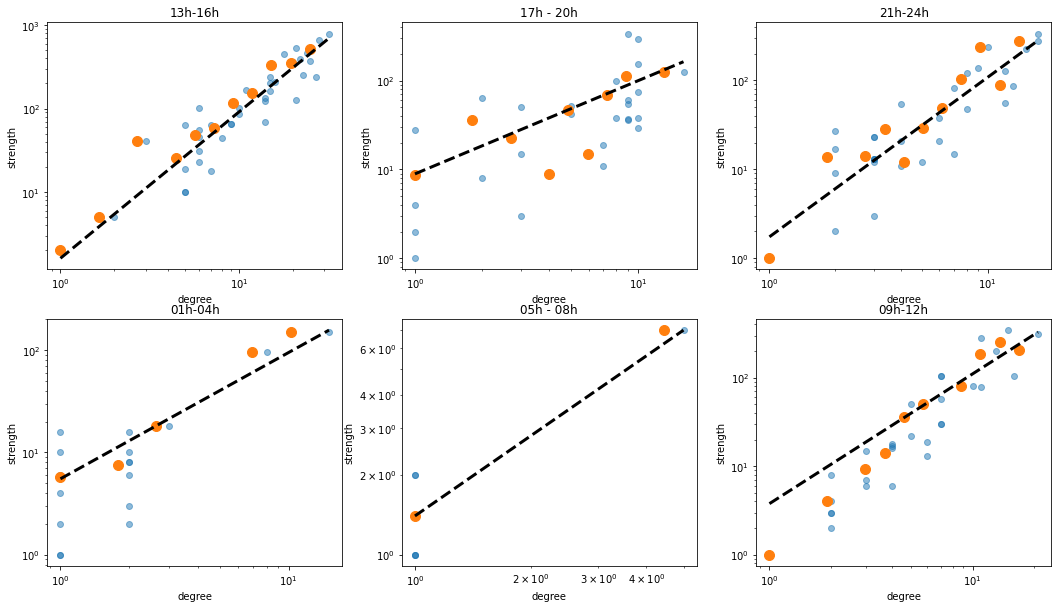

In [579]:
correlation_day(edges, 1)

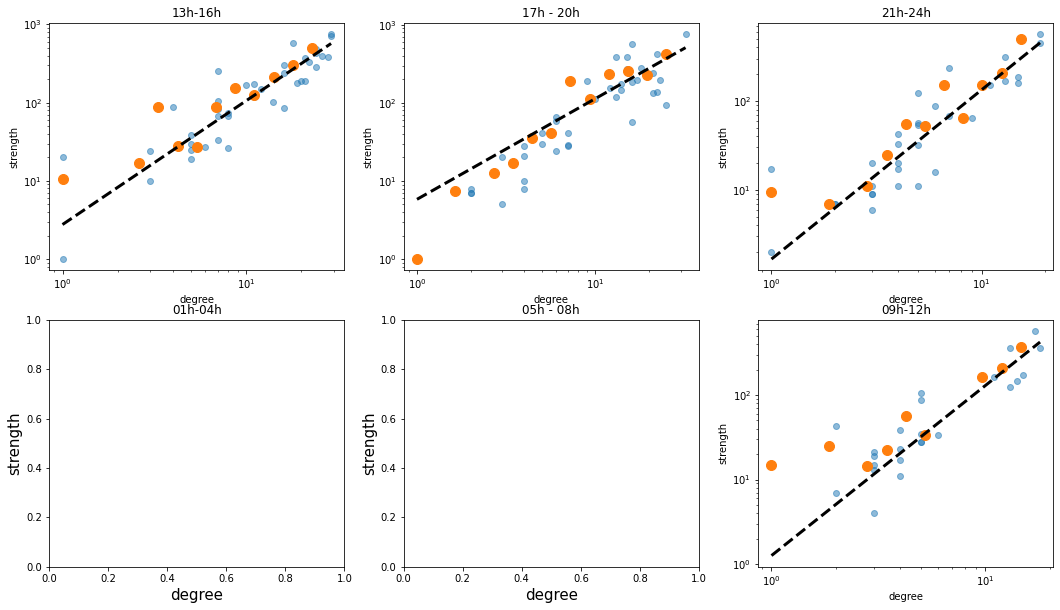

In [580]:
correlation_day(edges, 2)

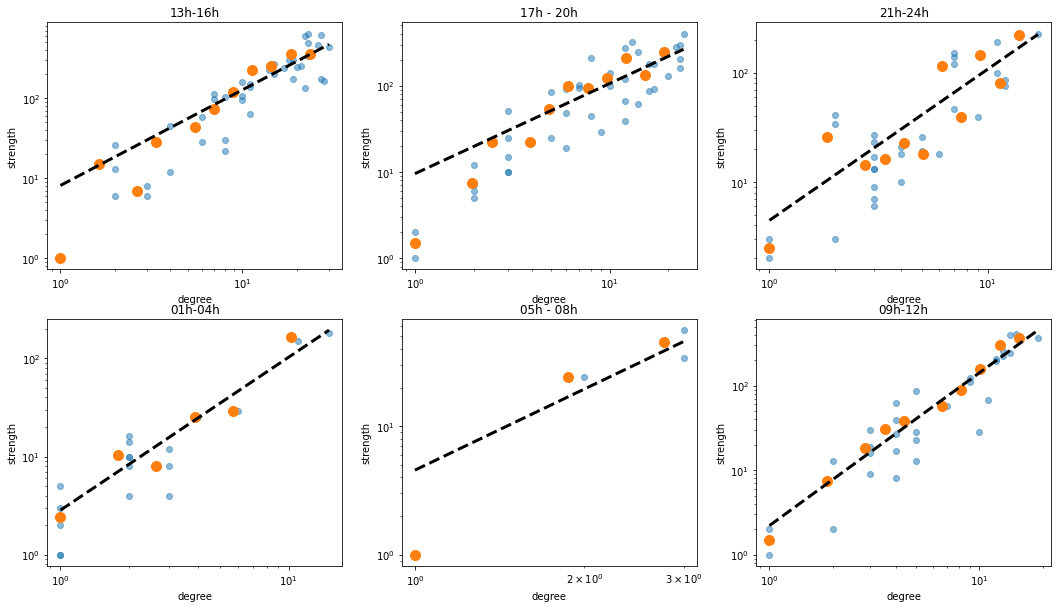

In [581]:
correlation_day(edges, 3)

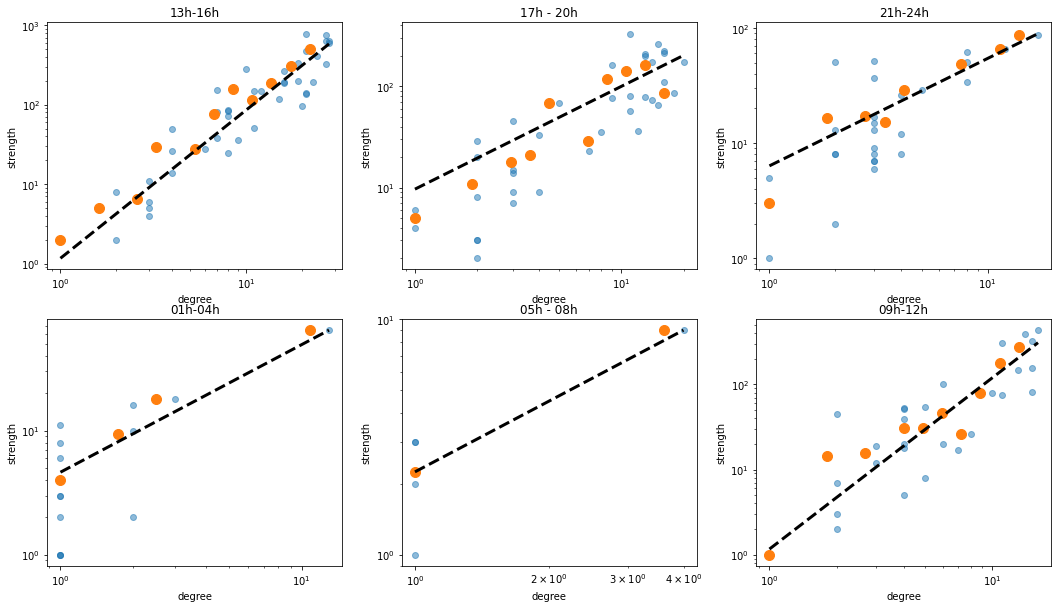

In [582]:
correlation_day(edges, 4)

In [652]:
######     idea 2     ######
# components and community

import community.community_louvain as cl

def community_day(edges, day):
    
    edges_day = edges[(day-1)*6: day*6]
    
    community_list = []
    
    for i in range(0,6):
        g = nx.from_pandas_edgelist(edges_day[i-1],
                                    source = 'node1',
                                    target = 'node2',
                                    edge_attr = 'count',
                                    create_using = nx.Graph())
        
        # nx.is_connected(g)
        communities = cl.best_partition(g,weight='count')
        
        list_of_communities = set(communities.values())
        
        nodes_in_community={}
        for el in list_of_communities:
            nodes_in_community[el]=[node for node in communities.keys() if communities[node]==el]
        
        community_list.append(nodes_in_community)
        
    
    data_list = []
    
    for communities in community_list:
        
        column1 = []
        column2 = []
        i = 0
        for community in communities.values(): 
            
            column1 = column1 + community
            column2 = column2 + [i]*len(community)
            i = i+1
            
        data = pd.DataFrame({'node': column1,
                          'community': column2})
        
        data= pd.merge(left = data, right= nodes, on = 'node')
        
        data_list.append(data)
    
    return data_list


In [654]:
data_list = community_day(edges, 1)

In [656]:
data_list[1].tail()

,node,community,type
22,1149,3,NUR
23,1365,3,PAT
24,1393,3,PAT
25,1190,3,NUR
26,1320,3,PAT


In [673]:
crosstab = pd.crosstab(index = data_list[1]['community'],
                       columns = data_list[1]['type'])
crosstab

type,ADM,MED,NUR,PAT
community,,,,
0,1,0,1,0
1,0,5,0,1
2,0,1,0,1
3,2,0,12,3


In [672]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

chi2_contingency(crosstab)

(25.707692307692312,
 0.0022804030160389994,
 9,
 array([[0.22222222, 0.44444444, 0.96296296, 0.37037037],
        [0.66666667, 1.33333333, 2.88888889, 1.11111111],
        [0.22222222, 0.44444444, 0.96296296, 0.37037037],
        [1.88888889, 3.77777778, 8.18518519, 3.14814815]]))

In [674]:
crosstab = pd.crosstab(index = data_list[2]['community'],
                       columns = data_list[2]['type'])
crosstab

type,ADM,MED,NUR,PAT
community,,,,
0,1,0,4,11
1,1,8,0,1
2,0,0,1,3


In [675]:
chi2_contingency(crosstab)

(23.762500000000003,
 0.0005774764033757531,
 6,
 array([[1.06666667, 4.26666667, 2.66666667, 8.        ],
        [0.66666667, 2.66666667, 1.66666667, 5.        ],
        [0.26666667, 1.06666667, 0.66666667, 2.        ]]))

In [676]:
crosstab = pd.crosstab(index = data_list[3]['community'],
                       columns = data_list[3]['type'])
crosstab

type,NUR,PAT
community,,
0,2,14
1,2,0


In [677]:
chi2_contingency(crosstab)

(3.6261160714285716,
 0.0568794097700683,
 1,
 array([[ 3.55555556, 12.44444444],
        [ 0.44444444,  1.55555556]]))

In [ ]:
######     idea 3     ######

